Best 30-day Trading Strategy Sequence:
['S5', 'S4', 'S5', 'S4', 'S5', 'S4', 'S5', 'S4', 'S5', 'S5', 'S4', 'S5', 'S4', 'S5', 'S5', 'S4', 'S5', 'S4', 'S5', 'S4', 'S5', 'S4', 'S5', 'S4', 'S5', 'S5', 'S4', 'S5', 'S4', 'S5']
Total Profit (fitness score): 1.9000000000000004
Cumulative Drawdown: -3.85
Consecutive Repetition Penalties (count): 3


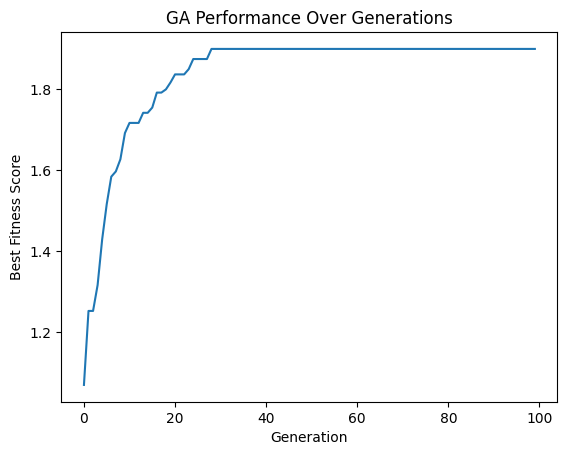

In [1]:
import random
import matplotlib.pyplot as plt

# Trading Strategies Data
strategies = {
    "S1": {"return": 0.005, "risk": 1, "drawdown": -0.01},
    "S2": {"return": 0.012, "risk": 2, "drawdown": -0.025},
    "S3": {"return": 0.025, "risk": 3, "drawdown": -0.05},
    "S4": {"return": 0.05,  "risk": 4, "drawdown": -0.10},
    "S5": {"return": 0.10,  "risk": 5, "drawdown": -0.15},
}
STRATEGY_CODES = list(strategies.keys())
DAYS = 30


# GA Parameters
POP_SIZE = 100
GENERATIONS = 100
TOURNAMENT_SIZE = 5
MUTATION_RATE = 0.05


# Chromosome Representation & Initialization

def generate_chromosome():
    """Generate a random chromosome representing a 30-day trading strategy sequence.
       Each gene is one of the available strategies (S1-S5)."""
    return [random.choice(STRATEGY_CODES) for _ in range(DAYS)]

def initialize_population(pop_size):
    """Initialize a population of random chromosomes."""
    return [generate_chromosome() for _ in range(pop_size)]


# Fitness Function

def fitness(chromosome):
    """
    Calculating the fitness score for a trading strategy sequence.
    
    The fitness is computed as the total expected return over 30 days
    minus penalties for:
      Any single-day drawdown at or below -15% (penalty = 0.10, applied once)
      Cumulative drawdown below -30% (penalty = 0.20)
       Each occurrence of consecutive strategy repetitions (penalty = 0.05 per occurrence)
    
    A higher fitness score indicates a better trading strategy plan.
    """
    total_return = 0.0
    cumulative_drawdown = 0.0
    penalty_single = 0.0
    penalty_consecutive = 0.0
    
    for i, strat in enumerate(chromosome):
        strat_data = strategies[strat]
        total_return += strat_data["return"]
        cumulative_drawdown += strat_data["drawdown"]
        
        # Apply penalty if day's drawdown is at or below -15%
        if strat_data["drawdown"] <= -0.15:
            penalty_single = 0.10
        
        # Penalty for consecutive strategy repetition
        if i > 0 and chromosome[i] == chromosome[i-1]:
            penalty_consecutive += 0.05
    
    penalty_cumulative = 0.20 if cumulative_drawdown < -0.30 else 0.0
    
    fitness_value = total_return - (penalty_single + penalty_cumulative + penalty_consecutive)
    return fitness_value


# GA Operators
def tournament_selection(population, fitnesses, tournament_size=TOURNAMENT_SIZE):
    
    # Select one chromosome using tournament selection.Higher fitness is better.
    
    tournament = random.sample(list(zip(population, fitnesses)), tournament_size)
    tournament.sort(key=lambda x: x[1], reverse=True)
    return tournament[0][0]

def single_point_crossover(parent1, parent2):
    #Perform a single-point crossover between two parent chromosomes.
    point = random.randint(1, DAYS - 2)
    child = parent1[:point] + parent2[point:]
    return child

def mutate(chromosome, mutation_rate=MUTATION_RATE):
    
    #Perform mutation on a chromosome.
    #With a probability of mutation_rate, change a gene to a different random strategy.
    
    new_chromosome = chromosome.copy()
    for i in range(DAYS):
        if random.random() < mutation_rate:
            current = new_chromosome[i]
            alternatives = [s for s in STRATEGY_CODES if s != current]
            new_chromosome[i] = random.choice(alternatives)
    return new_chromosome

# GA Execution
def run_trading_ga():
    population = initialize_population(POP_SIZE)
    best_chromosome = None
    best_fit = float('-inf')
    fitness_history = []
    
    for gen in range(GENERATIONS):
        fitnesses = [fitness(chromo) for chromo in population]
        max_fit = max(fitnesses)
        if max_fit > best_fit:
            best_fit = max_fit
            best_chromosome = population[fitnesses.index(max_fit)]
        fitness_history.append(best_fit)
        
        new_population = []
        while len(new_population) < POP_SIZE:
            parent1 = tournament_selection(population, fitnesses)
            parent2 = tournament_selection(population, fitnesses)
            child = single_point_crossover(parent1, parent2)
            child = mutate(child, mutation_rate=MUTATION_RATE)
            new_population.append(child)
        population = new_population
        
    return best_chromosome, best_fit, fitness_history


if __name__ == "__main__":
    best_strategy_sequence, best_profit, history = run_trading_ga()
    print("Best 30-day Trading Strategy Sequence:")
    print(best_strategy_sequence)
    print("Total Profit (fitness score):", best_profit)
    
    # Additional Risk Analysis:
    cumulative_drawdown = sum(strategies[s]["drawdown"] for s in best_strategy_sequence)
    consecutive_penalties = sum(1 for i in range(1, DAYS) if best_strategy_sequence[i] == best_strategy_sequence[i-1])
    
    print("Cumulative Drawdown:", cumulative_drawdown)
    print("Consecutive Repetition Penalties (count):", consecutive_penalties)
    
    # Plot GA performance over generations
    plt.plot(history)
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness Score")
    plt.title("GA Performance Over Generations")
    plt.show()
